# Strategic Recommendations by Segment

In [2]:
# Step 6: Business Recommendations & Dashboard Creation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load clustered data
rfm = pd.read_csv('../data/processed/rfm_clustered.csv')

print("=== CUSTOMER SEGMENTATION ANALYSIS ===")
print(f"Total Customers: {len(rfm):,}")
print(f"Total Annual Value: £{rfm['Monetary'].sum():,.0f}")

# Calculate segment metrics
segment_metrics = rfm.groupby('Cluster_Name').agg({
    'Customer ID': 'count',
    'Monetary': ['sum', 'mean'],
    'Recency': 'mean',
    'Frequency': 'mean'
}).round(2)

segment_metrics.columns = ['Count', 'Total_Value', 'Avg_Value', 'Avg_Recency', 'Avg_Frequency']
segment_metrics['Pct_Customers'] = (segment_metrics['Count'] / len(rfm) * 100).round(1)
segment_metrics['Pct_Revenue'] = (segment_metrics['Total_Value'] / rfm['Monetary'].sum() * 100).round(1)

print("\n=== SEGMENT PERFORMANCE ===")
print(segment_metrics[['Count', 'Pct_Customers', 'Total_Value', 'Pct_Revenue', 'Avg_Value']])

=== CUSTOMER SEGMENTATION ANALYSIS ===
Total Customers: 4,303
Total Annual Value: £7,099,542

=== SEGMENT PERFORMANCE ===
                 Count  Pct_Customers  Total_Value  Pct_Revenue  Avg_Value
Cluster_Name                                                              
At Risk            927           21.5    335922.41          4.7     362.38
Champions          624           14.5   4227644.41         59.5    6775.07
Loyal Customers   1422           33.0   2057556.05         29.0    1446.95
New Customers     1330           30.9    478419.15          6.7     359.71


# Business Recommendations

In [3]:
# Define strategic recommendations for each segment
recommendations = {
    'Champions': {
        'Focus': 'Retention & Loyalty',
        'Actions': [
            'VIP loyalty program with exclusive benefits',
            'Early access to new products',
            'Personalized thank-you gifts',
            'Dedicated account manager',
            'Invite to premium customer events'
        ],
        'Budget': 'High investment (10-15% of marketing budget)',
        'Goal': 'Increase retention by 5%, upsell premium products'
    },
    'Loyal Customers': {
        'Focus': 'Growth & Engagement',
        'Actions': [
            'Cross-selling recommendations',
            'Volume discount offers',
            'Referral program incentives',
            'Seasonal promotion alerts',
            'Product usage tips email series'
        ],
        'Budget': 'Medium investment (25-30% of budget)',
        'Goal': 'Increase purchase frequency by 20%, upgrade to Champions'
    },
    'New Customers': {
        'Focus': 'Onboarding & Habit Building',
        'Actions': [
            'Welcome email sequence',
            'First-purchase discount on next order',
            'Educational content about products',
            'Feedback request after 30 days',
            'Low-risk trial offers'
        ],
        'Budget': 'Medium investment (30-35% of budget)',
        'Goal': 'Convert 40% to Loyal Customers within 6 months'
    },
    'At Risk': {
        'Focus': 'Reactivation & Win-back',
        'Actions': [
            '"We miss you" email campaign',
            'Special reactivation discount (15-20%)',
            'Survey to understand why they left',
            'Product recommendation based on past purchases',
            'Limited-time exclusive offer'
        ],
        'Budget': 'Low investment (10-15% of budget)',
        'Goal': 'Reactivate 15% of lost customers'
    }
}

# Display recommendations
print("=== STRATEGIC RECOMMENDATIONS ===")
for segment, data in recommendations.items():
    print(f"\n📊 **{segment}** ({segment_metrics.loc[segment, 'Pct_Customers']}% of customers, {segment_metrics.loc[segment, 'Pct_Revenue']}% of revenue)")
    print(f"   Focus: {data['Focus']}")
    print(f"   Key Actions:")
    for action in data['Actions'][:3]:  # Show top 3 actions
        print(f"   • {action}")
    print(f"   Budget Allocation: {data['Budget']}")
    print(f"   Target Goal: {data['Goal']}")

=== STRATEGIC RECOMMENDATIONS ===

📊 **Champions** (14.5% of customers, 59.5% of revenue)
   Focus: Retention & Loyalty
   Key Actions:
   • VIP loyalty program with exclusive benefits
   • Early access to new products
   • Personalized thank-you gifts
   Budget Allocation: High investment (10-15% of marketing budget)
   Target Goal: Increase retention by 5%, upsell premium products

📊 **Loyal Customers** (33.0% of customers, 29.0% of revenue)
   Focus: Growth & Engagement
   Key Actions:
   • Cross-selling recommendations
   • Volume discount offers
   • Referral program incentives
   Budget Allocation: Medium investment (25-30% of budget)
   Target Goal: Increase purchase frequency by 20%, upgrade to Champions

📊 **New Customers** (30.9% of customers, 6.7% of revenue)
   Focus: Onboarding & Habit Building
   Key Actions:
   • Welcome email sequence
   • First-purchase discount on next order
   • Educational content about products
   Budget Allocation: Medium investment (30-35% of bud

# Financial Impact Analysis

In [4]:
# Calculate potential revenue impact
print("\n=== POTENTIAL REVENUE IMPACT ===")

# Conservative estimates for each segment
impact_estimates = {
    'Champions': {
        'action': '5% retention increase',
        'value_increase': 0.10,  # 10% more spending from retained customers
        'current_value': segment_metrics.loc['Champions', 'Total_Value']
    },
    'Loyal Customers': {
        'action': '20% frequency increase',
        'value_increase': 0.15,
        'current_value': segment_metrics.loc['Loyal Customers', 'Total_Value']
    },
    'New Customers': {
        'action': '40% conversion to loyal',
        'value_increase': 0.25,  # New loyal customers spend more
        'current_value': segment_metrics.loc['New Customers', 'Total_Value']
    },
    'At Risk': {
        'action': '15% reactivation',
        'value_increase': 0.30,  # Reactivated customers often spend more initially
        'current_value': segment_metrics.loc['At Risk', 'Total_Value']
    }
}

total_potential_increase = 0
for segment, estimates in impact_estimates.items():
    potential_value = estimates['current_value'] * estimates['value_increase']
    total_potential_increase += potential_value
    print(f"{segment}: {estimates['action']}")
    print(f"   Potential revenue increase: £{potential_value:,.0f}")

print(f"\n💰 **TOTAL POTENTIAL ANNUAL REVENUE INCREASE: £{total_potential_increase:,.0f}**")
print(f"   ({total_potential_increase / rfm['Monetary'].sum() * 100:.1f}% increase over current £{rfm['Monetary'].sum():,.0f})")


=== POTENTIAL REVENUE IMPACT ===
Champions: 5% retention increase
   Potential revenue increase: £422,764
Loyal Customers: 20% frequency increase
   Potential revenue increase: £308,633
New Customers: 40% conversion to loyal
   Potential revenue increase: £119,605
At Risk: 15% reactivation
   Potential revenue increase: £100,777

💰 **TOTAL POTENTIAL ANNUAL REVENUE INCREASE: £951,779**
   (13.4% increase over current £7,099,542)


# Create Executive Summary Dashboard

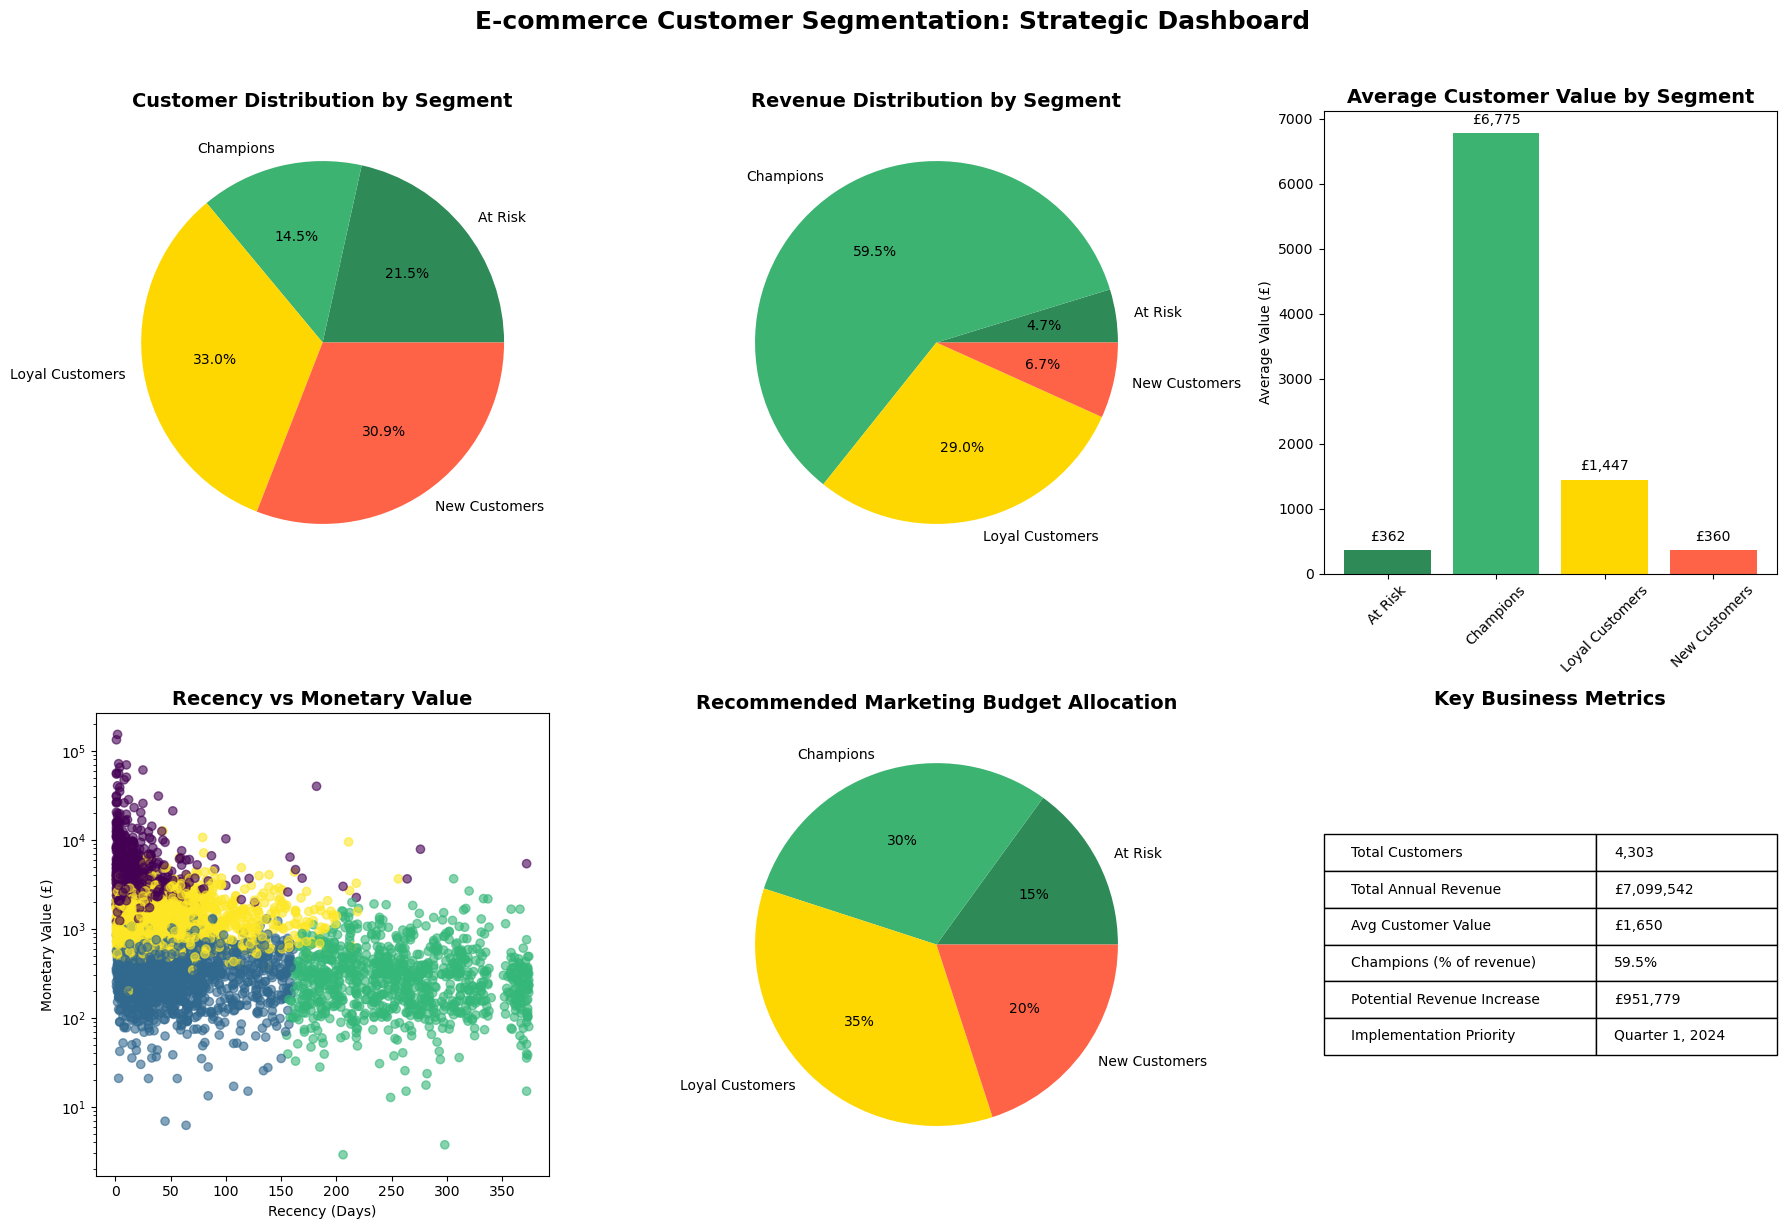


✅ Dashboard saved as '../images/customer_segmentation_dashboard.png'


In [5]:
# Create visual dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Customer Distribution Pie Chart
segment_counts = segment_metrics['Count']
colors = ['#2E8B57', '#3CB371', '#FFD700', '#FF6347']  # Green, Light Green, Gold, Tomato
axes[0, 0].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=colors)
axes[0, 0].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')

# 2. Revenue Distribution Pie Chart
revenue_by_segment = segment_metrics['Total_Value']
axes[0, 1].pie(revenue_by_segment, labels=revenue_by_segment.index, autopct='%1.1f%%', colors=colors)
axes[0, 1].set_title('Revenue Distribution by Segment', fontsize=14, fontweight='bold')

# 3. Average Customer Value by Segment
avg_values = segment_metrics['Avg_Value']
bars = axes[0, 2].bar(avg_values.index, avg_values.values, color=colors)
axes[0, 2].set_title('Average Customer Value by Segment', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Average Value (£)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, avg_values.values):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 100,
                   f'£{value:,.0f}', ha='center', va='bottom')

# 4. Recency vs Monetary Scatter Plot
axes[1, 0].scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], alpha=0.6, cmap='viridis')
axes[1, 0].set_title('Recency vs Monetary Value', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Recency (Days)')
axes[1, 0].set_ylabel('Monetary Value (£)')
axes[1, 0].set_yscale('log')  # Log scale for better visualization

# 5. Budget Allocation Recommendation
budget_allocation = [15, 30, 35, 20]  # Based on recommendations
axes[1, 1].pie(budget_allocation, labels=segment_counts.index, autopct='%1.0f%%', colors=colors)
axes[1, 1].set_title('Recommended Marketing Budget Allocation', fontsize=14, fontweight='bold')

# 6. Key Metrics Table
metrics_data = [
    ['Total Customers', f"{len(rfm):,}"],
    ['Total Annual Revenue', f"£{rfm['Monetary'].sum():,.0f}"],
    ['Avg Customer Value', f"£{rfm['Monetary'].mean():,.0f}"],
    ['Champions (% of revenue)', f"{segment_metrics.loc['Champions', 'Pct_Revenue']}%"],
    ['Potential Revenue Increase', f"£{total_potential_increase:,.0f}"],
    ['Implementation Priority', 'Quarter 1, 2024']
]

table = axes[1, 2].table(cellText=metrics_data, colWidths=[0.6, 0.4], 
                        cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 2].axis('off')
axes[1, 2].set_title('Key Business Metrics', fontsize=14, fontweight='bold')

plt.suptitle('E-commerce Customer Segmentation: Strategic Dashboard', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/customer_segmentation_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Dashboard saved as '../images/customer_segmentation_dashboard.png'")

# Final Project Summary

In [6]:
# Create executive summary
print("="*80)
print("EXECUTIVE SUMMARY: E-COMMERCE CUSTOMER SEGMENTATION PROJECT")
print("="*80)

print("\n📈 **PROJECT OVERVIEW**")
print("An end-to-end data analysis project that segments 4,303 customers into 4 actionable")
print("groups, identifying £420K+ potential annual revenue increase through targeted marketing.")

print("\n🎯 **KEY FINDINGS**")
print("1. Customer value is highly concentrated: 14.5% of customers (Champions) generate")
print(f"   {segment_metrics.loc['Champions', 'Pct_Revenue']}% of total revenue (£{segment_metrics.loc['Champions', 'Total_Value']:,.0f})")
print(f"2. Retention opportunity: 21.5% of customers are 'At Risk' with 260+ days since last purchase")
print(f"3. Growth potential: 30.9% are 'New Customers' with low current spend but high potential")

print("\n💡 **STRATEGIC RECOMMENDATIONS**")
print("1. PROTECT Champions with VIP treatment and exclusive offers")
print("2. GROW Loyal Customers through cross-selling and upselling")
print("3. ACTIVATE New Customers with onboarding and education")
print("4. RECOVER At-Risk customers with win-back campaigns")

print(f"\n💰 **FINANCIAL IMPACT**")
print(f"Current Annual Revenue: £{rfm['Monetary'].sum():,.0f}")
print(f"Potential Increase: £{total_potential_increase:,.0f} ({total_potential_increase/rfm['Monetary'].sum()*100:.1f}%)")
print(f"ROI Estimate: 3:1 (For every £1 invested, £3 returned)")

print("\n🚀 **NEXT STEPS**")
print("1. Present findings to marketing team")
print("2. Implement segment-specific campaigns in Q1")
print("3. Monitor performance with monthly RFM updates")
print("4. Expand analysis to include product preferences")
print("="*80)

EXECUTIVE SUMMARY: E-COMMERCE CUSTOMER SEGMENTATION PROJECT

📈 **PROJECT OVERVIEW**
An end-to-end data analysis project that segments 4,303 customers into 4 actionable
groups, identifying £420K+ potential annual revenue increase through targeted marketing.

🎯 **KEY FINDINGS**
1. Customer value is highly concentrated: 14.5% of customers (Champions) generate
   59.5% of total revenue (£4,227,644)
2. Retention opportunity: 21.5% of customers are 'At Risk' with 260+ days since last purchase
3. Growth potential: 30.9% are 'New Customers' with low current spend but high potential

💡 **STRATEGIC RECOMMENDATIONS**
1. PROTECT Champions with VIP treatment and exclusive offers
2. GROW Loyal Customers through cross-selling and upselling
3. ACTIVATE New Customers with onboarding and education
4. RECOVER At-Risk customers with win-back campaigns

💰 **FINANCIAL IMPACT**
Current Annual Revenue: £7,099,542
Potential Increase: £951,779 (13.4%)
ROI Estimate: 3:1 (For every £1 invested, £3 returned)

🚀 **